<h1 align='center'> Football Transfer Market Data Analysis <h1>


Explore the fascinating world of football data in this concise notebook. Based on the 'Football Data from Transfermarkt Football (Soccer) data' from Kaggle, this project dives into insights gleaned from the Transfermarkt website.

Created by Rodrigo Rubio in July 2023, this notebook focuses on unraveling sports data in team sports, specifically football. 

If you find this notebook valuable, please upvote and feel free to provide feedback on the visualizations and suggest improvements. Check out the credits below for other helpful resources.



In [3]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print("Packages installed")

Packages installed


# Get Data

In [5]:
import pandas as pd

# Cargar el archivo CSV en un dataframe
df = pd.read_csv("afa_2015_2022_eng.csv")






In [3]:
import pandas as pd

# Establecer opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

arg_juniors_games = df[(df['team_home'] == 'Argentinos') | (df['team_away'] == 'Argentinos')]
print(arg_juniors_games)


           tournament  week  game        team_home         team_away  goals_home  goals_away  possesion_home  on_target_home  attemps_home  fouls_home  corner_kicks_home  possesion_away  on_target_away  attemps_away  fouls_away  corner_kicks_away  yellow_cards_home  yellow_cards_away  red_cards_home  red_cards_away  team_value_home  mean_height_home  mean_age_home  lefties_proportion_home  team_value_away  mean_height_away  mean_age_away  lefties_proportion_away result        game_datetime  odds_home  odds_away  odds_draw
11    Campeonato 2015     1    12       Argentinos       Atl Rafaela           2           0             NaN             NaN           NaN         NaN                NaN             NaN             NaN           NaN         NaN                NaN                NaN                NaN             NaN             NaN           12.050          1.781250      24.707317                 0.195122           17.075          1.806136      24.708333                 0.145833      

In [6]:
arg_juniors_games = df[(df['team_home'] == 'Argentinos') | (df['team_away'] == 'Argentinos')]
num_games = len(arg_juniors_games)
print("Cantidad de partidos de Argentinos Juniors:", num_games)


Cantidad de partidos de Argentinos Juniors: 172


In [30]:
Campeonato_2018 = arg_juniors_games[arg_juniors_games['tournament'] == 'Campeonato 2022']
print(Campeonato_2018)


           tournament  week  game          team_home         team_away  goals_home  goals_away  possesion_home  on_target_home  attemps_home  fouls_home  corner_kicks_home  possesion_away  on_target_away  attemps_away  fouls_away  corner_kicks_away  yellow_cards_home  yellow_cards_away  red_cards_home  red_cards_away  team_value_home  mean_height_home  mean_age_home  lefties_proportion_home  team_value_away  mean_height_away  mean_age_away  lefties_proportion_away result        game_datetime  odds_home  odds_away  odds_draw
2457  Campeonato 2022     1    14         Argentinos          Aldosivi           2           1            50.0             3.0          12.0        10.0                3.0            50.0             4.0          15.0        12.0                6.0                1.0                3.0             0.0             0.0           29.350          1.770286      24.243243                 0.189189           11.825          1.790000      24.553191                 0.212766  

In [12]:
transicion_2016_games = arg_juniors_games[arg_juniors_games['tournament'] == 'Transicion 2016']
print(transicion_2016_games)

          tournament  week  game         team_home       team_away  goals_home  goals_away  possesion_home  on_target_home  attemps_home  fouls_home  corner_kicks_home  possesion_away  on_target_away  attemps_away  fouls_away  corner_kicks_away  yellow_cards_home  yellow_cards_away  red_cards_home  red_cards_away  team_value_home  mean_height_home  mean_age_home  lefties_proportion_home  team_value_away  mean_height_away  mean_age_away  lefties_proportion_away result        game_datetime  odds_home  odds_away  odds_draw
454  Transicion 2016     1     5        Argentinos           Tigre           1           1             NaN             NaN           NaN         NaN                NaN             NaN             NaN           NaN         NaN                NaN                NaN                NaN             NaN             NaN           16.550          1.782895      24.871795                 0.256410           24.300          1.808205      26.121951                 0.170732      D  2

**Goles realizados por Argentinos Juniors**

In [68]:
arg_juniors_home = df[df['team_home'] == 'Argentinos']
arg_juniors_away = df[df['team_away'] == 'Argentinos']

num_games = len(arg_juniors_home) + len(arg_juniors_away)
print("Cantidad de partidos de Argentinos Juniors:", num_games)

goals_by_tournament_home = arg_juniors_home.groupby('tournament')['goals_home'].sum()
goals_by_tournament_away = arg_juniors_away.groupby('tournament')['goals_away'].sum()

goals_by_tournament = pd.concat([goals_by_tournament_home, goals_by_tournament_away], axis=1)
goals_by_tournament.columns = ['Goles Local', 'Goles Visitante']
goals_by_tournament['Cantidad de Partidos'] = arg_juniors_games.groupby('tournament')['game'].count()

print("\nCantidad de goles de Argentinos Juniors por campeonato:\n")
print(goals_by_tournament)

Cantidad de partidos de Argentinos Juniors: 172

Cantidad de goles de Argentinos Juniors por campeonato:

                    Goles Local  Goles Visitante  Cantidad de Partidos
tournament                                                            
Campeonato 2015              19               11                    30
Campeonato 2017/18           23               13                    27
Campeonato 2018/19            5               10                    25
Campeonato 2021              16               10                    25
Campeonato 2022              18               12                    26
Superliga 2019/20            17                5                    23
Transicion 2016               4                7                    16


Cantidad de partidos de Argentinos Juniors: 172


<Figure size 864x432 with 0 Axes>

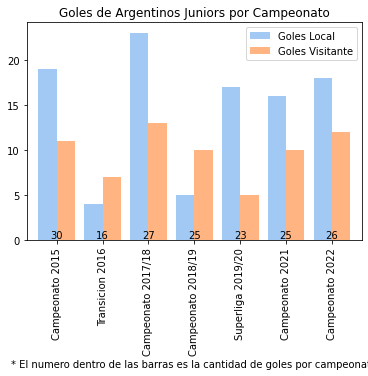

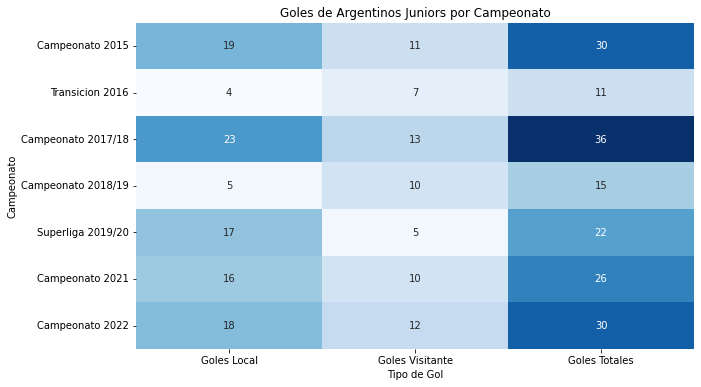

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

arg_juniors_home = df[df['team_home'] == 'Argentinos']
arg_juniors_away = df[df['team_away'] == 'Argentinos']

num_games = len(arg_juniors_home) + len(arg_juniors_away)
print("Cantidad de partidos de Argentinos Juniors:", num_games)

goals_by_tournament_home = arg_juniors_home.groupby('tournament')['goals_home'].sum()
goals_by_tournament_away = arg_juniors_away.groupby('tournament')['goals_away'].sum()

goals_by_tournament = pd.concat([goals_by_tournament_home, goals_by_tournament_away], axis=1)
goals_by_tournament.columns = ['Goles Local', 'Goles Visitante']
goals_by_tournament['Goles Totales'] = goals_by_tournament['Goles Local'] + goals_by_tournament['Goles Visitante']
goals_by_tournament['Cantidad de Partidos'] = arg_juniors_games.groupby('tournament')['game'].count()


# Ordenar las filas del DataFrame según el orden deseado
order = ['Campeonato 2015', 'Transicion 2016', 'Campeonato 2017/18', 'Campeonato 2018/19',
         'Superliga 2019/20', 'Campeonato 2021', 'Campeonato 2022']
goals_by_tournament = goals_by_tournament.reindex(order)
                                 
# Configurar colores para las barras agrupadas
colors = sns.color_palette("pastel", 2)

# Visualización en forma de gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = goals_by_tournament[['Goles Local', 'Goles Visitante']].plot(kind='bar', width=0.8, color=colors)
plt.xlabel('* El numero dentro de las barras es la cantidad de goles por campeonato')
plt.title('Goles de Argentinos Juniors por Campeonato')
plt.xticks(rotation=90)
plt.legend()

# Agregar etiquetas con la cantidad de partidos
for i, val in enumerate(goals_by_tournament['Cantidad de Partidos']):
    ax.annotate(str(val), xy=(i, 0), ha='center', va='bottom', color='black')


plt.show()

# Tabla de goles por campeonato
plt.figure(figsize=(10, 6))
sns.heatmap(goals_by_tournament[['Goles Local', 'Goles Visitante', 'Goles Totales']],
            annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Tipo de Gol')
plt.ylabel('Campeonato')
plt.title('Goles de Argentinos Juniors por Campeonato')
plt.show()


**Goles recibidos por Argentinos Juniors**

Cantidad de partidos de Argentinos Juniors: 172


<Figure size 864x432 with 0 Axes>

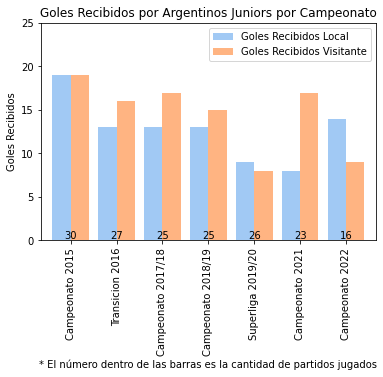

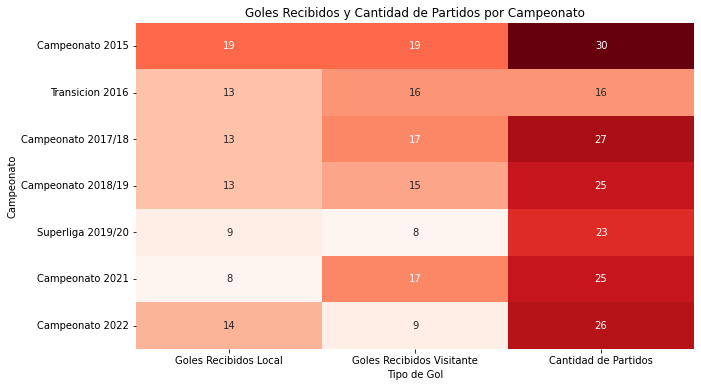

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

arg_juniors_games = df[(df['team_home'] == 'Argentinos') | (df['team_away'] == 'Argentinos')]

num_games = len(arg_juniors_games)
print("Cantidad de partidos de Argentinos Juniors:", num_games)

goals_received_home = arg_juniors_games[arg_juniors_games['team_home'] == 'Argentinos'].groupby('tournament')['goals_away'].sum()
goals_received_away = arg_juniors_games[arg_juniors_games['team_away'] == 'Argentinos'].groupby('tournament')['goals_home'].sum()

goals_received = pd.concat([goals_received_home, goals_received_away], axis=1)
goals_received.columns = ['Goles Recibidos Local', 'Goles Recibidos Visitante']

# Ordenar las filas del DataFrame según el orden deseado
order = ['Campeonato 2015', 'Transicion 2016', 'Campeonato 2017/18', 'Campeonato 2018/19',
         'Superliga 2019/20', 'Campeonato 2021', 'Campeonato 2022']
goals_received = goals_received.reindex(order)

# Obtener la cantidad de partidos por campeonato
num_partidos = arg_juniors_games.groupby('tournament')['game'].count()

# Configurar colores para las barras agrupadas
colors = sns.color_palette("pastel", 2)

# Visualización en forma de gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = goals_received[['Goles Recibidos Local', 'Goles Recibidos Visitante']].plot(kind='bar', width=0.8, color=colors)
plt.xlabel('* El número dentro de las barras es la cantidad de partidos jugados')
plt.ylabel('Goles Recibidos')
plt.title('Goles Recibidos por Argentinos Juniors por Campeonato')
plt.xticks(rotation=90)
plt.yticks(range(0, 26, 5))
plt.ylim(0, 25)  # Limitar el eje Y hasta un máximo de 25

# Agregar etiquetas con la cantidad de partidos
for i, val in enumerate(num_partidos):
    ax.annotate(str(val), xy=(i, 0), ha='center', va='bottom', color='black')

plt.legend()
plt.show()

# Tabla de goles recibidos y cantidad de partidos por campeonato
plt.figure(figsize=(10, 6))
heatmap_data = goals_received[['Goles Recibidos Local', 'Goles Recibidos Visitante']].copy()
heatmap_data['Cantidad de Partidos'] = num_partidos
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.xlabel('Tipo de Gol')
plt.ylabel('Campeonato')
plt.title('Goles Recibidos y Cantidad de Partidos por Campeonato')
plt.show()



**Posesión de Argentinos Juniors promedio de local y visitante**

Cantidad de partidos de Argentinos Juniors: 172


<Figure size 864x432 with 0 Axes>

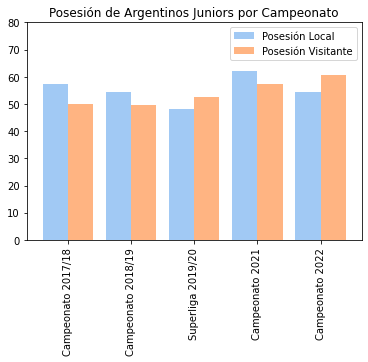

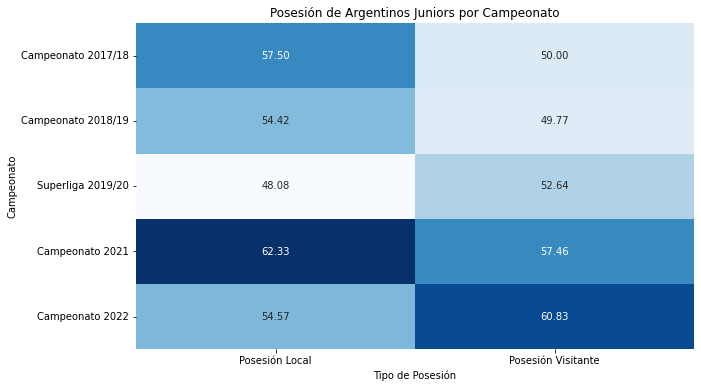

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

arg_juniors_home = df[df['team_home'] == 'Argentinos']
arg_juniors_away = df[df['team_away'] == 'Argentinos']

num_games = len(arg_juniors_home) + len(arg_juniors_away)
print("Cantidad de partidos de Argentinos Juniors:", num_games)

possession_by_tournament_home = arg_juniors_home.groupby('tournament')['possesion_home'].mean()
possession_by_tournament_away = arg_juniors_away.groupby('tournament')['possesion_away'].mean()

possession_by_tournament = pd.concat([possession_by_tournament_home, possession_by_tournament_away], axis=1)
possession_by_tournament.columns = ['Posesión Local', 'Posesión Visitante']
possession_by_tournament['Posesión Total'] = possession_by_tournament['Posesión Local'] + possession_by_tournament['Posesión Visitante']

# Ordenar las filas del DataFrame según el orden deseado
order = ['Campeonato 2017/18', 'Campeonato 2018/19',
         'Superliga 2019/20', 'Campeonato 2021', 'Campeonato 2022']
possession_by_tournament = possession_by_tournament.reindex(order)

# Configurar colores para las barras agrupadas
colors = sns.color_palette("pastel", 2)

# Visualización en forma de gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = possession_by_tournament[['Posesión Local', 'Posesión Visitante']].plot(kind='bar', width=0.8, color=colors)
plt.xlabel('')
plt.title('Posesión de Argentinos Juniors por Campeonato')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(0, 80)  # Limitar el eje Y hasta un máximo de 25

plt.show()

# Tabla de posesión por campeonato
plt.figure(figsize=(10, 6))
sns.heatmap(possession_by_tournament[['Posesión Local', 'Posesión Visitante']],
            annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Tipo de Posesión')
plt.ylabel('Campeonato')
plt.title('Posesión de Argentinos Juniors por Campeonato')
plt.show()


